# Breast cancer wisconsin Classification (Malignant or Benign)

The goal of this project is to classify whether the breast cancer is malignant or benign.

#### Dataset: https://goo.gl/U2Uwz2



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Dixit01/100daysofML/main/TensorFlow/data/B_cancer_classification.csv')

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


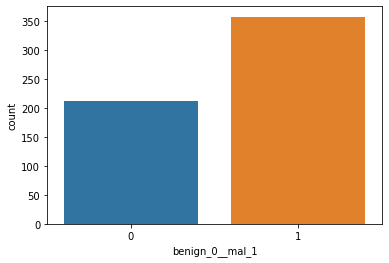

In [10]:
sns.countplot(data=df,x='benign_0__mal_1');

In [11]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)   # Check the correlation

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

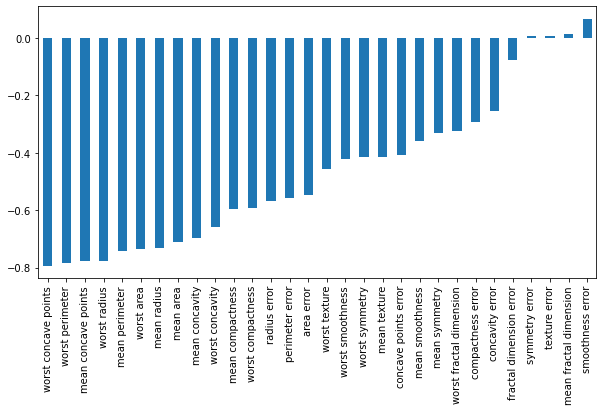

In [12]:
plt.figure(figsize=(10, 5))
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar');

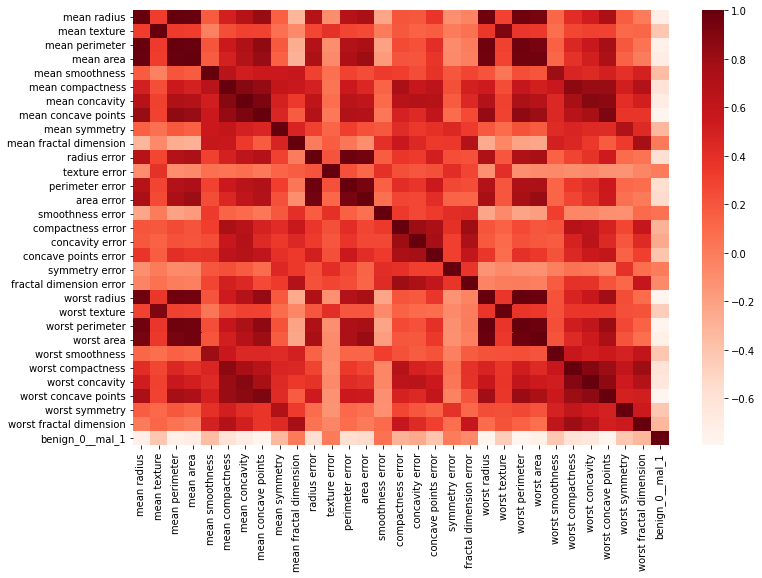

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap = "Reds");

## Train Test Split

In [30]:
X = df.iloc[:, 0:-1]
y = df['benign_0__mal_1']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Scaling Data

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
X_train.shape

(426, 30)

In [43]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))


model.add(Dense(1, activation='sigmoid'))       # Binary Classification  (Sigmoid)

model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 


In [44]:
model.fit(x=X_train, y=y_train, 
             epochs=500,
             validation_data=(X_test, y_test),
             verbose=1)

Epoch 1/500
14/14 [==============================] - 2s 46ms/step - loss: 0.6573 - val_loss: 0.6304
Epoch 2/500
14/14 [==============================] - 0s 14ms/step - loss: 0.6215 - val_loss: 0.5993
Epoch 3/500
14/14 [==============================] - 0s 9ms/step - loss: 0.5869 - val_loss: 0.5631
Epoch 4/500
14/14 [==============================] - 0s 10ms/step - loss: 0.5469 - val_loss: 0.5191
Epoch 5/500
14/14 [==============================] - 0s 10ms/step - loss: 0.5013 - val_loss: 0.4689
Epoch 6/500
14/14 [==============================] - 0s 11ms/step - loss: 0.4549 - val_loss: 0.4231
Epoch 7/500
14/14 [==============================] - 0s 10ms/step - loss: 0.4114 - val_loss: 0.3774
Epoch 8/500
14/14 [==============================] - 0s 8ms/step - loss: 0.3723 - val_loss: 0.3376
Epoch 9/500
14/14 [==============================] - 0s 8ms/step - loss: 0.3370 - val_loss: 0.3066
Epoch 10/500
14/14 [==============================] - 0s 10ms/step - loss: 0.3076 - val_loss: 0.2783
Ep

In [45]:
losses = pd.DataFrame(model.history.history)

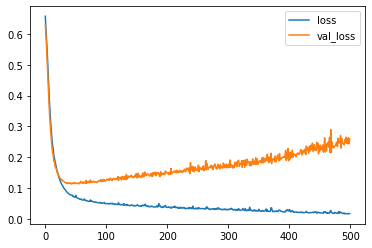

In [46]:
losses.plot();

Initally, the loss is started to decrease on validation and it get spiked up after a certain point in time of few epoches.
This is a perfect example of overfitting. 

### Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

+ **`monitor`**: Quantity to be monitored. Which we are monitoring such as `val_loss` or `accuracy`.
+ **`mode`**: if we are monitoring loss, we want to minimize it. So we use `min`. For the case of accuracy, we want to maximize it. So we use `max`
+ **` patience`**: Number of epochs with no improvement after which training will be stopped. It is a hard stopping.

In [56]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))


model.add(Dense(1, activation='sigmoid'))    # Binary Classification (Sigmoid))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [57]:
from tensorflow.keras.callbacks import EarlyStopping   # help(EarlyStopping)

In [59]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [60]:
model.fit(x=X_train, y=y_train,
             validation_data=(X_test, y_test),
             epochs=500,
             callbacks=[early_stopping],
             verbose=1)

Epoch 1/500
14/14 [==============================] - 1s 16ms/step - loss: 0.7022 - val_loss: 0.6860
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6708 - val_loss: 0.6534
Epoch 3/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6368 - val_loss: 0.6125
Epoch 4/500
14/14 [==============================] - 0s 7ms/step - loss: 0.5911 - val_loss: 0.5636
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5423 - val_loss: 0.5088
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4866 - val_loss: 0.4557
Epoch 7/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4340 - val_loss: 0.4044
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3871 - val_loss: 0.3558
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.3452 - val_loss: 0.3157
Epoch 10/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3106 - val_loss: 0.2854
Epoch 11

In [61]:
losses = pd.DataFrame(model.history.history)

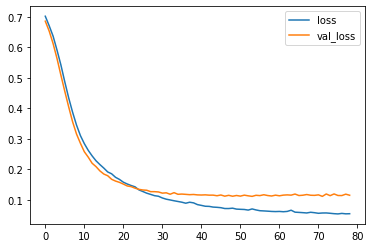

In [62]:
losses.plot();

This is the plot that we want to see. Both loss and val_loss are beginning to decrease.

------

### Adding in DropOut Layers

**Early Stopping**

- Keras can automatically stop training based on a loss condition on the validation data passed during the model.fit call.

**Dropout Layers**

- can be added to layers to "turn off" neurons during training to prevent overfitting.

- each dropout layer will "drop" a user-defined percentage of neuron units in the previous layer every batch.

**We can define by `model.add(Dropout(0 ~ 1))`: values can between 0 and 1.**

0 percent , 1 mean 100% of neurons.

In [63]:
from tensorflow.keras.layers import Dropout

In [64]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) # 50% of randomly selected neurons for each batch (1 entire epoch triaining) will be truned off

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [65]:
early_stopping = EarlyStopping(monitor='val_loss',
                                                  mode='min',
                                                  patience=25,
                                                  verbose=1)

In [66]:
model.fit(x=X_train, y=y_train,
             validation_data=(X_test, y_test),
             callbacks=[early_stopping],
             epochs=600)

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.7270 - val_loss: 0.6849
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6933 - val_loss: 0.6658
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6692 - val_loss: 0.6514
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6586 - val_loss: 0.6366
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6403 - val_loss: 0.6233
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6302 - val_loss: 0.6044
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6082 - val_loss: 0.5864
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5995 - val_loss: 0.5674
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5709 - val_loss: 0.5455
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5589 - val_loss: 0.5198
Epoch 11

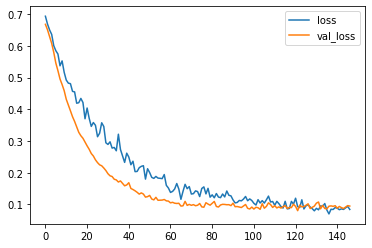

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot();

This is great. Both loss and val_loss are flattening out at the same time.

## Model Evaluation

In [90]:
predictions = model.predict(X_test)
predictions = np.round(predictions ).astype(int)
predictions[:5]


array([[1],
       [1],
       [1],
       [0],
       [1]])

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [78]:
confusion_matrix(y_test, predictions)

array([[54,  1],
       [ 2, 86]])

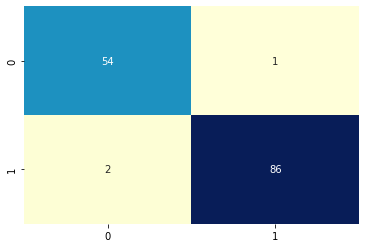

In [82]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False, cmap='YlGnBu');

-----